In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tqdm import tqdm
from datetime import datetime
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


C:\Users\Girija Joshi\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Girija Joshi\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Girija Joshi\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Girija Joshi\anaconda3\envs\

In [2]:
# getting names of all the files in IDC_regular_ps50_idx5and sub dirs
print("Please wait getting all images.....")
# files = glob('Resources/IDC_regular_ps50_idx5/*/*/*')
files = glob('C:\BootCamp\BreastCancerClassification\equal_images/*/*/*')

# Example : Resources/IDC_regular_ps50_idx5\\10254\\0\\10254_idx5_x1001_y1001_class0.png'

Please wait getting all images.....


In [3]:
# checking how many are cancer files which has class1 in it
count =0 
for file in files:
    if 'class1' in file:
        count+=1

In [4]:
print('------------------')

print(f'Number Of 1: {count}')
print(f'Number Of 0: {len(files) - count}')
# total number of files
print(f'Total: {len(files)}')

------------------
Number Of 1: 68378
Number Of 0: 68378
Total: 136756


In [5]:
# get 80% of total for training and 20% for testing
train_num = int(len(files) * 0.80)
test_num = len(files) - train_num

In [6]:
# create X and y train data
def find_data(files, lower_limit, upper_limit):
    X = []
    y = []
    
    # tqdm(patient_ids)
    for file in tqdm(files[lower_limit:upper_limit]):
        if file.endswith(".png"):
            # Convering cureent image into PIL image format. PIL image format is RGB format.
            img = tf.keras.preprocessing.image.load_img(file, target_size = (50,50))

            # Keras provides the img_to_array() function for converting a loaded image in PIL format into a NumPy array 
            #for use with deep learning models. The image is convertated into t [height, width, channels]

            # # Arguments
            #         img: PIL Image instance.
            #         data_format: Image data format,
            #             either "channels_first" or "channels_last".
            #         dtype: Dtype to use for the returned array.
            # Returns: A 3D Numpy array.
            
            # The component values are often stored as integer numbers in the range 0 to 255, 
            # the range that a single 8-bit byte can offer,
            pixels = tf.keras.preprocessing.image.img_to_array(img)

            # converting into 0 - 1, This is called as Normalization will help you to remove distortions 
            # caused by lights and shadows in an image.
            pixels /= 255
            X.append(pixels)
            if 'class1' in file:
                y.append(1)
            elif 'class0' in file:
                y.append(0)
    return np.stack(X), y

In [7]:
print(f'Num of training files: {train_num}\nNum of test files:{test_num}')


Num of training files: 109404
Num of test files:27352


In [8]:
X_train,y_train = find_data(files,0, train_num)

100%|██████████████████████████████████████████████████████████████████████████| 109404/109404 [19:12<00:00, 94.90it/s]


In [9]:
X_test, y_test = find_data(files, train_num, len(files))

100%|████████████████████████████████████████████████████████████████████████████| 27352/27352 [04:58<00:00, 91.64it/s]


<AxesSubplot:ylabel='count'>

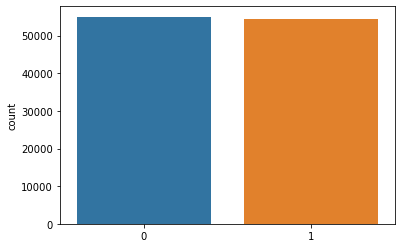

In [10]:
import seaborn as sns
sns.countplot(y_train)

<AxesSubplot:ylabel='count'>

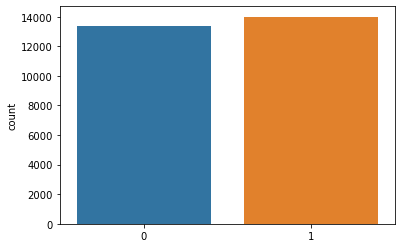

In [11]:
sns.countplot(y_test)

In [12]:
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, Activation, MaxPooling2D, Flatten, BatchNormalization

In [13]:
# X_train2 is 4 diemtion we need to convert in 2D
X_train.shape

(109404, 50, 50, 3)

In [14]:
def form_model(inp_shape = (50,50,3)):
    inp = Input(inp_shape)
    m = Conv2D(32, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(inp)
    m = MaxPooling2D(2)(m)
    # m = BatchNormalization()(m)
    
    m = Conv2D(64, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(m)
    m = MaxPooling2D(2)(m)
    # m = BatchNormalization()(m)
    
    m = Conv2D(128, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(m)
    m = MaxPooling2D(2)(m)
    
#     m = Conv2D(128, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(m)
#     m = MaxPooling2D(2)(m)
    
    
#     m = Conv2D(256, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(m)
#     m = MaxPooling2D(2)(m)
    
    m = Flatten()(m)
    
    m = Dense(128, activation = "relu")(m)
    out = Dense(1, activation = "sigmoid")(m)
    model = Model(inp, out)
    model.compile(optimizer = keras.optimizers.SGD(1e-3, momentum=0.9), loss="binary_crossentropy", metrics = ['acc'])
    return model


In [15]:
model = form_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 50, 50, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0     

In [ ]:
now = datetime.now()
start_fit = now.strftime("%H:%M:%S.%f")
print(f'Time Before Model Fit: {start_fit}')

In [18]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 25, batch_size=1024)

Train on 109404 samples, validate on 27352 samples
Epoch 1/25
109404/109404 [==============================] - 688s 6ms/sample - loss: 0.5336 - acc: 0.7643 - val_loss: 0.4351 - val_acc: 0.8232
Epoch 2/25
109404/109404 [==============================] - 810s 7ms/sample - loss: 0.4791 - acc: 0.7894 - val_loss: 0.4143 - val_acc: 0.8276
Epoch 3/25
109404/109404 [==============================] - 811s 7ms/sample - loss: 0.4657 - acc: 0.7966 - val_loss: 0.4285 - val_acc: 0.8203
Epoch 4/25
109404/109404 [==============================] - 669s 6ms/sample - loss: 0.4592 - acc: 0.7988 - val_loss: 0.4057 - val_acc: 0.8288
Epoch 5/25
109404/109404 [==============================] - 669s 6ms/sample - loss: 0.4548 - acc: 0.8008 - val_loss: 0.4040 - val_acc: 0.8285
Epoch 6/25
109404/109404 [==============================] - 707s 6ms/sample - loss: 0.4545 - acc: 0.8003 - val_loss: 0.4009 - val_acc: 0.8286
Epoch 7/25
109404/109404 [==============================] - 692s 6ms/sample - loss: 0.4496 - acc:

In [ ]:
now = datetime.now()
end_fit = now.strftime("%H:%M:%S.%f")
print(f'Time After Model Fit: {end_fit}')

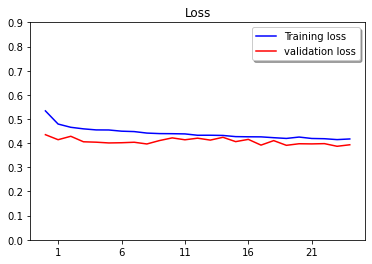

In [34]:
epochs = 25

plt.figure()
plt.title("Loss")
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="validation loss")
plt.xticks(np.arange(1, epochs, 5))
plt.yticks(np.arange(0, 1, 0.1))
plt.legend(loc='best', shadow=True)
plt.show()
plt.close()

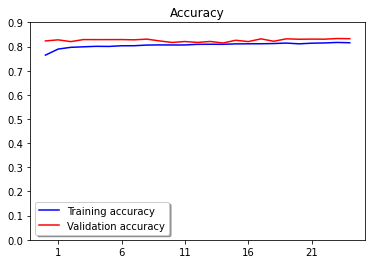

In [38]:
plt.figure()
plt.title("Accuracy")
plt.plot(history.history['acc'], color='b', label="Training accuracy")
plt.plot(history.history['val_acc'], color='r',label="Validation accuracy")
plt.xticks(np.arange(1, epochs, 5))
plt.yticks(np.arange(0, 1, 0.1))
plt.legend(loc='best', shadow=True)
plt.show()
plt.close()

In [ ]:
now = datetime.now()
start_eval = now.strftime("%H:%M:%S.%f")
print(f'Time Before Model Evaluate Test Data: {start_eval}')

In [19]:
# evaluating and printing results 
score = model.evaluate(X_test, y_test, verbose = 0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Test loss: 0.3933380467260954
Test accuracy: 0.8324071


In [ ]:
now = datetime.now()
end_eval = now.strftime("%H:%M:%S.%f")
print(f'Time After Model Evaluate Test Data: {end_eval}')

In [30]:
pred = model.predict(X_test)

res = []
for prediction in pred:
    if(prediction > 0.5):
        res.append(1)
    else:
        res.append(0)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, res))
print(classification_report(y_test, res))


[[10483  2871]
 [ 1713 12285]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82     13354
           1       0.81      0.88      0.84     13998

    accuracy                           0.83     27352
   macro avg       0.84      0.83      0.83     27352
weighted avg       0.83      0.83      0.83     27352

